In [150]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [151]:
df1 = pd.read_csv("d:/jangravs/revision/amazon_sales_report.csv")

In [152]:

df = df1.copy()

In [153]:
df.head(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN


In [154]:
df.tail(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [155]:


def change_column_names(df):
    new_columns = []
    for col in df.columns:
        new_col = col.replace(" ", "_").lower()
        new_columns.append(new_col)
    
    df.columns = new_columns
    return df



df = change_column_names(df)


In [156]:
df.head(1)

,index,order_id,date,status,fulfilment,sales_channel,ship-service-level,category,size,courier_status,...,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,b2b,fulfilled-by,new,pendings
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN


In [157]:
df.isnull().sum()/len(df)*100

index                   0.000000
order_id                0.000000
date                    0.000000
status                  0.000000
fulfilment              0.000000
sales_channel           0.000000
ship-service-level      0.000000
category                0.000000
size                    0.000000
courier_status          0.000000
qty                     0.000000
currency                6.047637
amount                  6.047637
ship-city               0.027137
ship-state              0.027137
ship-postal-code        0.027137
ship-country            0.027137
b2b                     0.000000
fulfilled-by           69.557902
new                   100.000000
pendings              100.000000
dtype: float64

In [158]:
df.drop(["fulfilled-by","new","pendings"],axis=1,inplace=True)

In [159]:
df.dropna(inplace=True)

In [160]:
df.isnull().sum()/len(df)*100

index                 0.0
order_id              0.0
date                  0.0
status                0.0
fulfilment            0.0
sales_channel         0.0
ship-service-level    0.0
category              0.0
size                  0.0
courier_status        0.0
qty                   0.0
currency              0.0
amount                0.0
ship-city             0.0
ship-state            0.0
ship-postal-code      0.0
ship-country          0.0
b2b                   0.0
dtype: float64

In [161]:
unique_value ={col_name : df[col_name].unique()for col_name in df.columns}
unique_value

{'index': array([     0,      1,      2, ..., 128972, 128973, 128974], dtype=int64),
 'order_id': array(['405-8078784-5731545', '171-9198151-1101146',
        '404-0687676-7273146', ..., '407-9547469-3152358',
        '402-6184140-0545956', '408-7436540-8728312'], dtype=object),
 'date': array(['04-30-22', '04-29-22', '04-28-22', '04-27-22', '04-26-22',
        '04-25-22', '04-24-22', '04-23-22', '04-22-22', '04-21-22',
        '04-20-22', '04-19-22', '04-18-22', '04-17-22', '04-16-22',
        '04-15-22', '04-14-22', '04-13-22', '04-12-2022', '04-11-2022',
        '04-10-2022', '04-09-2022', '04-08-2022', '04-07-2022',
        '04-06-2022', '04-05-2022', '04-04-2022', '04-03-2022',
        '04-02-2022', '04-01-2022', '03-31-22', '05-31-22', '05-30-22',
        '05-29-22', '05-28-22', '05-27-22', '05-26-22', '05-25-22',
        '05-24-22', '05-23-22', '05-22-22', '05-21-22', '05-20-22',
        '05-19-22', '05-18-22', '05-17-22', '05-16-22', '05-15-22',
        '05-14-22', '05-13-22', 

In [162]:
df["ship-city"].unique()

array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [163]:
df.shape

(121143, 18)

In [164]:
df['date']=pd.to_datetime (df['date'])

C:\Users\sachin\AppData\Local\Temp\ipykernel_15284\3986877744.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']=pd.to_datetime (df['date'])


In [165]:
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [166]:
df['ship-postal-code'].dtype

dtype('int32')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121143 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               121143 non-null  int64         
 1   order_id            121143 non-null  object        
 2   date                121143 non-null  datetime64[ns]
 3   status              121143 non-null  object        
 4   fulfilment          121143 non-null  object        
 5   sales_channel       121143 non-null  object        
 6   ship-service-level  121143 non-null  object        
 7   category            121143 non-null  object        
 8   size                121143 non-null  object        
 9   courier_status      121143 non-null  object        
 10  qty                 121143 non-null  int64         
 11  currency            121143 non-null  object        
 12  amount              121143 non-null  float64       
 13  ship-city           121143 non-nul

In [168]:
df.describe()

,index,date,qty,amount,ship-postal-code
count,121143.000000,121143,121143.000000,121143.000000,121143.000000
mean,64486.312655,2022-05-12 12:11:22.182214144,0.961252,648.576874,463623.724507
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,32294.500000,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,64477.000000,2022-05-10 00:00:00,1.000000,605.000000,500032.000000
75%,96682.500000,2022-06-04 00:00:00,1.000000,788.000000,600020.000000
max,128974.000000,2022-06-29 00:00:00,8.000000,5584.000000,989898.000000
std,37220.415404,NaN,0.214276,281.196896,191301.588170


# Exploratory Data Analysis

In [169]:
df.columns

Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship-service-level', 'category', 'size', 'courier_status', 'qty',
       'currency', 'amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'b2b'],
      dtype='object')

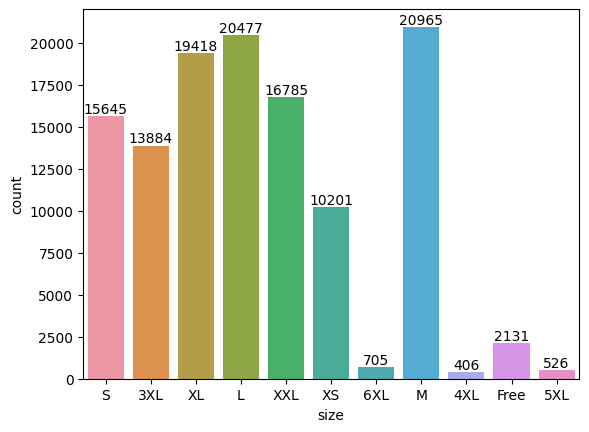

In [170]:
a = sns.countplot(x="size",data = df)
for bars in a.containers:
    a.bar_label(bars)

### Note: From above Graph you can see that most of the people buys M-Size 

# Group By
#### The groupby() function in pandas is used to group data based on one or more columns in a DataFrame

In [171]:
s = df.groupby(['size'], as_index=False)['qty'].sum().sort_values(by='qty',ascending=False)
s

,size,qty
6,M,20113
5,L,19667
8,XL,18611
10,XXL,16217
7,S,15019
0,3XL,13341
9,XS,9835
4,Free,2051
3,6XL,687
2,5XL,512


AttributeError: module 'matplotlib' has no attribute 'gcf'

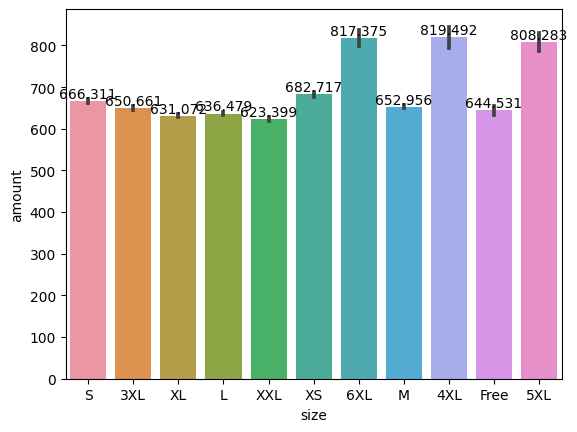

In [172]:
a= sns.barplot(x= "size", y="amount",data = df)
for bars in a.containers:
    a.bar_label(bars)
plt. gcf().set_size_inches(10,3)
plt.show()

### Note: Above graph shows total amount of all sizes and M size having maximum total amount. 

<Axes: xlabel='courier_status', ylabel='count'>

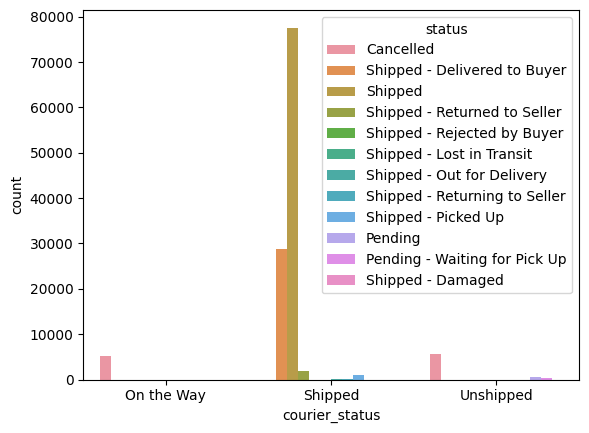

In [ ]:

a= sns.countplot(data=df,x= "courier_status",hue= "status" )
a

##### Note: From above Graph the majority of the orders are shipped through the courier.

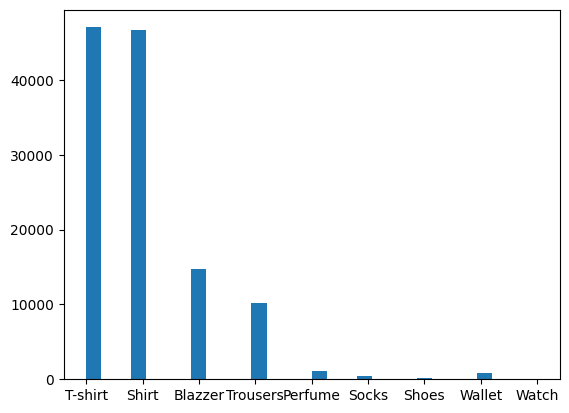

In [ ]:
df['category'] = df['category']
column_data = df['category']
plt.hist(column_data, bins=30)
plt.show()

##### Note: From above Graph you can see that most of the  buyers are T-shirt 

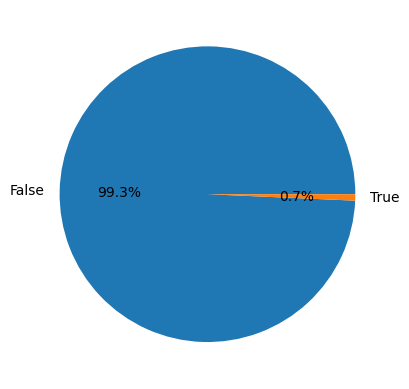

In [ ]:
B2B_Check = df['b2b'].value_counts()

plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')

plt.show()


##### Note : From above chart  we can see that maximum i.e. 99.3% of buyers are retailers and 0.7% are B2B buyers

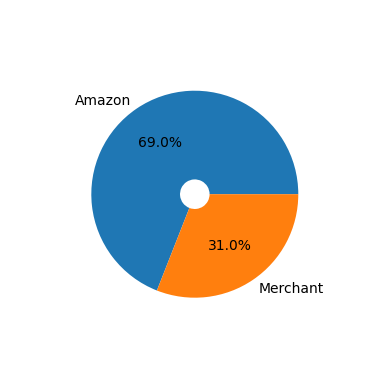

In [ ]:

a1 = df['fulfilment'].value_counts()


fig, ax = plt.subplots()

ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))

plt.show()

##### Note: From above chart you can see that most of the  Fulfilment  are  amazon 

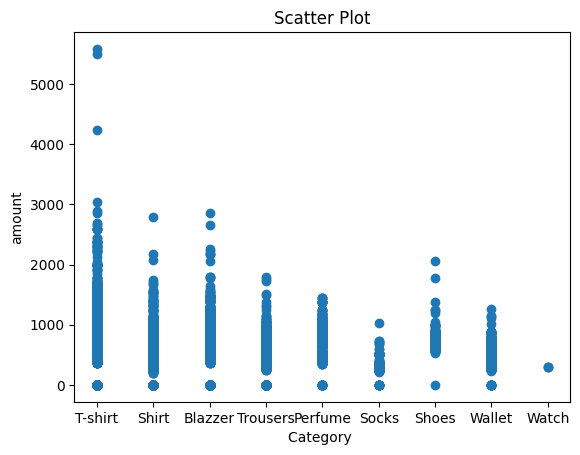

In [ ]:
x_data = df['category']  
y_data = df['amount'] 

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category ')  
plt.ylabel('amount')  
plt.title('Scatter Plot') 
plt.show()

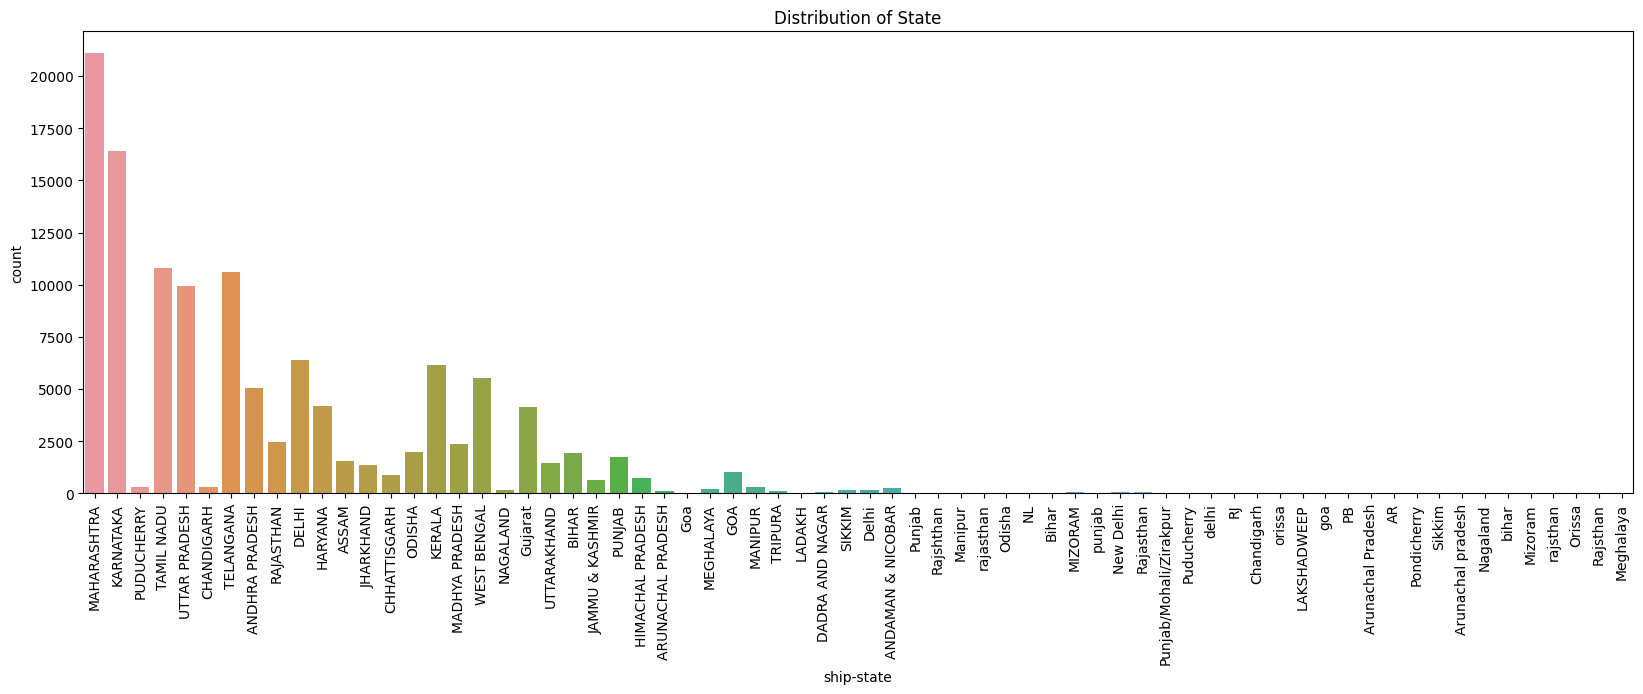

In [ ]:
# Plot count of cities by state
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

### Note : This graph show count of ship state of all state.

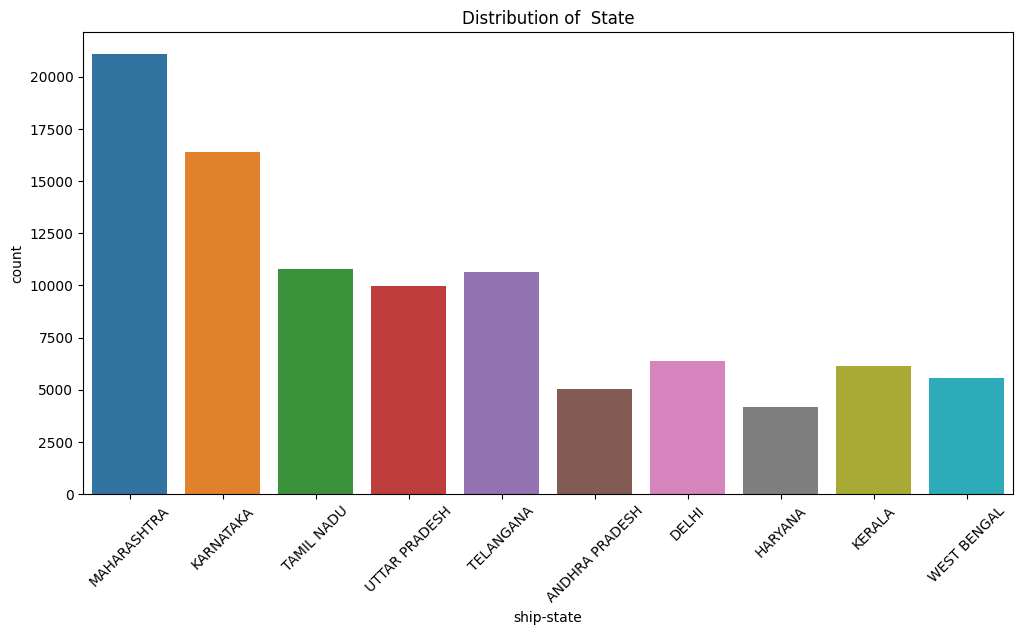

In [ ]:
# top_10_States 
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

#### Note: From above Graph you can see that most of the  buyers are Maharashtra state

## Conclusion

### The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.